# Laporan Proyek Machine Learning - Novan Nur Hidayat

# PENGEMBANGAN SISTEM REKOMENDASI MAKANAN DENGAN ALGORITMA _CONTENT BASED FILTERING_ DAN _COLLABORATIVE FILTERING_

## Project Overview

- Latar belakang

  Makanan sangat penting bagi manusia, baik sebagai kebutuhan primer maupun sebagai komponen kehidupan sehari-hari seseorang. Kemerosotan ekonomi yang telah mempengaruhi beberapa industri telah menyebabkan peluang baru yang membuat industri kuliner, khususnya divisi _online_-nya, semakin sukses. Wisata kuliner menjadi hal terpenting di dunia kuliner. Memanfaatkan informasi yang tersedia di internet membuat banyak masyarakat lebih sulit untuk memilih kebutuhan mereka [1].




In [87]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

## Business Understanding

### Problem Statements

- Apakah sistem rekomendasi _hybrid_ dapat menjadi solusi yang efektif untuk merekomendasikan makanan kepada pelanggan yang sesuai dengan keinginannya?

- Bagaimana tahapan dalam pembuatan sistem rekomendasi _hybrid_ yang akan merekomendasikan makanan sesuai preferensi pelanggan?

### Goals

- Tujuan yang dimaksudkan adalah untuk membantu pelayan agar tidak bingung dalam merekomendasikan makanan, dikarenakan selera orang terkadang berbeda-beda. Solusi yang dihasilkan harus dapat memaksimalkan rekomendasi yang diberikan sekaligus memastikan rekomendasi tersebut dapat diterima dengan baik oleh pelanggan.

- Tujuan utamanya adalah untuk mengembangkan model atau sistem rekomendasi yang dapat mengidentifikasi dan merekomendasikan makanan untuk menyesuaikan dengan preferensi pelanggan. Tujuan proses rekomendasi ini adalah untuk memberikan lebih banyak makanan yang sesuai minat dan bagaimana mengidentifikasi karakteristik pelanggan, seperti makanan yang disukai sebelumnya dan kemiripan selera dengan pelanggan lain yang mempengaruhi nilai rekomendasi.

### Solution Approach

- Menggunakan pendekatan _Content Based Filtering_ untuk merekomendasikan makanan ke pelanggan sesuai minat sebelumnya dan _Collaborative Filtering_ untuk merekomendasikan makanan ke pelanggan sesuai persamaan kesukaan dengan pelanggan lain. Hal ini bertujuan untuk melakukan rekomendasi dengan memanfaatkan kekuatan masing-masing model. Evaluasi model dapat menggunakan metrik seperti _Root Mean Squared Error (RMSE)_ untuk mengukur seberapa baik model merekomendasi makanan.


## Data Understanding

  Data yang digunakan dalam proyek ini bersumber dari [Kaggle-Food Recommendation System](https://www.kaggle.com/schemersays/food-recommendation-system)

  Jumlah data pada dataset _foods.csv_ sebanyak 400 data, yang terbagi dalam 5 kolom. Kolom pertama yaitu 'Food_ID' yang di _rename_ menjadi 'id_makanan' memiliki 400 data unik bertipe _integer_, kolom 'Name' yang di _rename_ menjadi 'nama_makanan' memiliki 400 data unik bertipe _object_, kolom 'C_Type' yang di _rename_ menjadi 'jenis_makanan' memiliki 400 data bertipe _object_ dengan 16 jenis makanan yang unik, kolom 'Veg_Non' yang di _rename_ menjadi 'veg_non' memiliki 400 data bertipe _object_, kolom 'Describe' yang di _rename_ menjadi 'deskripsi' memiliki 400 data unik bertipe _object_. Dataset dapat lebih lanjut dilihat pada Tabel 1 dan 2.


In [46]:
foods = pd.read_csv('foods.csv')
foods

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."
...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count..."
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl..."
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli..."
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu..."


### Variabel-variabel pada _Food Recommendation System_ adalah sebagai berikut:

Dataset _foods.csv_

- id_makanan : Nomor id dari masing-masing makanan.
- nama_makanan : Nama dari masing-masing makanan dari sebuah restoran.
- jenis_makanan : Jenis makanan apakah makanan tersebut termasuk 'Healthy_Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai' 'Korean' 'Vietnames' 'Nepalese' 'Spanish'.
- veg_non : Mengidentifikasi apakah makanan tersebut termasuk dalam Vegan atau Non-Vegan.
- deskripsi : Deskripsi komposisi dari makanan.

In [47]:
# Mengubah nama kolom "C_Type" menjadi "jenis_makanan" dan nama kolom "Describe" menjadi "deskripsi"
foods = foods.rename(columns={'Food_ID': 'id_makanan', 'Name': 'nama_makanan', 'C_Type': 'jenis_makanan', 'Veg_Non': 'veg_non', 'Describe': 'deskripsi'})
foods

,id_makanan,nama_makanan,jenis_makanan,veg_non,deskripsi
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."
...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count..."
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl..."
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli..."
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu..."


In [48]:
# Melihat info lebih lanjur mengenai dataset
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_makanan     400 non-null    int64 
 1   nama_makanan   400 non-null    object
 2   jenis_makanan  400 non-null    object
 3   veg_non        400 non-null    object
 4   deskripsi      400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [49]:
# Mengecek missing value
foods.isnull().sum()

id_makanan       0
nama_makanan     0
jenis_makanan    0
veg_non          0
deskripsi        0
dtype: int64

In [50]:
foods_duplicates = foods.duplicated().sum()
print("Jumlah duplikat dalam DataFrame foods:", foods_duplicates)

Jumlah duplikat dalam DataFrame foods: 0


In [51]:
# Mengecek variabel nama_makanan yang unik
print('Jumlah data: ', len(foods.nama_makanan.unique()))
print('Jenis model: ', foods.nama_makanan.unique())

Jumlah data:  400
Jenis model:  ['summer squash salad' 'chicken minced salad' 'sweet chilli almonds'
 'tricolour salad' 'christmas cake'
 'japanese curry arancini with barley salsa' 'chocolate nero cookies'
 'lamb and chargrilled bell pepper soup' 'cream of almond soup'
 'broccoli and almond soup' 'coconut lime quinoa salad'
 'lemon honey glazed sous vide corn on the cob'
 'watermelon and strawberry smoothie' 'peach, raspberry and nuts smoothie'
 'almond and cranberry poha' 'almond and raw banana galawat'
 'baked namakpara with roasted almond dip' 'grilled almond barfi'
 'baked shankarpali ' 'baked multigrain murukku' 'apple rabdi'
 'baked namak para' 'dates and nuts ladoo' 'green lentil dessert fudge'
 'cashew nut cookies' 'almond pearls' 'hawaiin papaya salad'
 'vegetable som tam salad' 'spinach and feta crepes'
 'couscous with ratatouille - tangy tomato sauce' 'baked almond kofta'
 'almond and amaranth ladoo' 'moong dal kiwi coconut soup'
 'mixed berry & banana smoothie' 'banana wal

In [52]:
print('Jumlah data: ', len(foods.jenis_makanan.unique()))
print('Jenis makanan: ', foods.jenis_makanan.unique())

Jumlah data:  16
Jenis makanan:  ['Healthy Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai' 'Korean' ' Korean' 'Vietnames'
 'Nepalese' 'Spanish']


In [53]:
# Mengganti nilai "Healthy Food" menjadi "Healthy_Food"
foods['jenis_makanan'] = foods['jenis_makanan'].str.replace('Healthy Food', 'Healthy_Food').str.replace(' Korean', 'Korean')
print('Jumlah data: ', len(foods.jenis_makanan.unique()))
print('Jenis makanan: ', foods.jenis_makanan.unique())

Jumlah data:  15
Jenis makanan:  ['Healthy_Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai' 'Korean' 'Vietnames' 'Nepalese'
 'Spanish']


Jumlah data pada dataset _ratings.csv_ sebanyak 512 data, yang terbagi dalam 3 kolom. Kolom pertama yaitu 'User_ID' yang di _rename_ menjadi 'user_id' memiliki 512 data bertipe _integer_ dengan 101 data yang unik, kolom 'Food_ID' yang di _rename_ menjadi 'id_makanan' memiliki 512 data bertipe _integer_ dengan 310 data yang unik, kolom 'Rating' yang di _rename_ menjadi 'rating' memiliki 512 data bertipe _integer_. Terdapat 1 nilai NaN pada dataset ini. Dataset dapat lebih lanjut dilihat pada Tabel 3 dan 4.


In [54]:
ratings = pd.read_csv('ratings.csv')
ratings

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0
...,...,...,...
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0
510,100.0,29.0,7.0


Dataset _ratings.csv_

- user_id : Nomor id pelanggan yang memberikan rating pada makanan.
- id_makanan : Nomor id dari masing-masing makanan.
- rating : Rating dari pelanggan tentang makanan tersebut.

In [55]:
# Mengubah nama kolom "User_ID" menjadi "user_id"
ratings = ratings.rename(columns={'User_ID': 'user_id', 'Food_ID': 'id_makanan', 'Rating': 'rating'})
ratings

,user_id,id_makanan,rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0
...,...,...,...
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0
510,100.0,29.0,7.0


In [56]:
ratings.describe()

,user_id,id_makanan,rating
count,511.000000,511.000000,511.000000
mean,49.068493,125.311155,5.438356
std,28.739213,91.292629,2.866236
min,1.000000,1.000000,1.000000
25%,25.000000,45.500000,3.000000
50%,49.000000,111.000000,5.000000
75%,72.000000,204.000000,8.000000
max,100.000000,309.000000,10.000000


In [57]:
print('Jumlah user id: ', len(ratings.user_id.unique()))
print('Jumlah id makanan: ', len(ratings.id_makanan.unique()))
print('Jumlah data rating: ', len(ratings))

Jumlah user id:  101
Jumlah id makanan:  310
Jumlah data rating:  512


In [58]:
ratings.isnull().sum()

user_id       1
id_makanan    1
rating        1
dtype: int64

In [59]:
ratings = ratings.dropna()
ratings.isnull().sum()

user_id       0
id_makanan    0
rating        0
dtype: int64

In [60]:
ratings

,user_id,id_makanan,rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0
...,...,...,...
506,99.0,65.0,7.0
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0


In [61]:
ratings_duplicates = ratings.duplicated().sum()
print("Jumlah duplikat dalam DataFrame ratings:", ratings_duplicates)

Jumlah duplikat dalam DataFrame ratings: 0


In [62]:
ratings.shape

(511, 3)

### Exploratory Data Analysis

In [63]:
# Menggabungkan dataset foods dan ratings menjadi dataframe baru
foods_all = pd.merge(foods, ratings, on='id_makanan', how='left')
foods_all

,id_makanan,nama_makanan,jenis_makanan,veg_non,deskripsi,user_id,rating
0,1,summer squash salad,Healthy_Food,veg,"white balsamic vinegar, lemon juice, lemon rin...",49.0,5.0
1,1,summer squash salad,Healthy_Food,veg,"white balsamic vinegar, lemon juice, lemon rin...",71.0,10.0
2,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",9.0,3.0
3,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",22.0,5.0
4,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",39.0,10.0
...,...,...,...,...,...,...,...
597,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count...",NaN,NaN
598,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl...",NaN,NaN
599,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli...",NaN,NaN
600,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu...",NaN,NaN


In [64]:
foods_all.isnull().sum()

id_makanan        0
nama_makanan      0
jenis_makanan     0
veg_non           0
deskripsi         0
user_id          91
rating           91
dtype: int64

In [65]:
# Menghapus missing value
foods_all = foods_all.dropna()
foods_all

,id_makanan,nama_makanan,jenis_makanan,veg_non,deskripsi,user_id,rating
0,1,summer squash salad,Healthy_Food,veg,"white balsamic vinegar, lemon juice, lemon rin...",49.0,5.0
1,1,summer squash salad,Healthy_Food,veg,"white balsamic vinegar, lemon juice, lemon rin...",71.0,10.0
2,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",9.0,3.0
3,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",22.0,5.0
4,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",39.0,10.0
...,...,...,...,...,...,...,...
506,305,sunga pork,Japanese,veg,curry,56.0,9.0
507,306,banana chips,Snack,veg,dried slices of bananas (fruits of herbaceous ...,80.0,8.0
508,307,bhurji- egg,Indian,non-veg,"made using indian spices, onion, tomatoes, gre...",71.0,1.0
509,308,flattened rice / poha,Indian,veg,dehusked rice which is flattened into flat lig...,97.0,3.0


In [66]:
foods_all.isnull().sum()

id_makanan       0
nama_makanan     0
jenis_makanan    0
veg_non          0
deskripsi        0
user_id          0
rating           0
dtype: int64

In [67]:
foods_all = foods_all.drop_duplicates()
foods_all

,id_makanan,nama_makanan,jenis_makanan,veg_non,deskripsi,user_id,rating
0,1,summer squash salad,Healthy_Food,veg,"white balsamic vinegar, lemon juice, lemon rin...",49.0,5.0
1,1,summer squash salad,Healthy_Food,veg,"white balsamic vinegar, lemon juice, lemon rin...",71.0,10.0
2,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",9.0,3.0
3,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",22.0,5.0
4,2,chicken minced salad,Healthy_Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",39.0,10.0
...,...,...,...,...,...,...,...
506,305,sunga pork,Japanese,veg,curry,56.0,9.0
507,306,banana chips,Snack,veg,dried slices of bananas (fruits of herbaceous ...,80.0,8.0
508,307,bhurji- egg,Indian,non-veg,"made using indian spices, onion, tomatoes, gre...",71.0,1.0
509,308,flattened rice / poha,Indian,veg,dehusked rice which is flattened into flat lig...,97.0,3.0


## Data Preparation

Mengkonversi data pada kolom 'id_makanan', 'nama_makanan', dan 'jenis_makanan' menjadi bentuk _list_ dan membuat _dictionary_ untuk menentukan pasangan _key-value_ antara ketiga kolom tersebut. Hasil dapat dilihat pada tabel 9.


In [68]:
# Mengonversi data series 'id_makanan' menjadi dalam bentuk list
food_id = foods_all['id_makanan'].tolist()

# Mengonversi data series ‘nama_makanan’ menjadi dalam bentuk list
food_name = foods_all['nama_makanan'].tolist()

# Mengonversi data series ‘jenis_makanan’ menjadi dalam bentuk list
food_varian = foods_all['jenis_makanan'].tolist()

print(len(food_id))
print(len(food_name))
print(len(food_varian))

511
511
511


In [69]:
# Membuat dictionary untuk data ‘id_makanan’, ‘nama_makanan’, dan ‘jenis_makanan’
foods_new = pd.DataFrame({
    'id_makanan': food_id,
    'nama_makanan': food_name,
    'jenis_makanan': food_varian
})
foods_new

,id_makanan,nama_makanan,jenis_makanan
0,1,summer squash salad,Healthy_Food
1,1,summer squash salad,Healthy_Food
2,2,chicken minced salad,Healthy_Food
3,2,chicken minced salad,Healthy_Food
4,2,chicken minced salad,Healthy_Food
...,...,...,...
506,305,sunga pork,Japanese
507,306,banana chips,Snack
508,307,bhurji- egg,Indian
509,308,flattened rice / poha,Indian


In [70]:
foods_new = foods_new.drop_duplicates()
foods_new

,id_makanan,nama_makanan,jenis_makanan
0,1,summer squash salad,Healthy_Food
2,2,chicken minced salad,Healthy_Food
5,3,sweet chilli almonds,Snack
7,4,tricolour salad,Healthy_Food
9,5,christmas cake,Dessert
...,...,...,...
506,305,sunga pork,Japanese
507,306,banana chips,Snack
508,307,bhurji- egg,Indian
509,308,flattened rice / poha,Indian


- _TF-IDF Vectorizer_

  Teknik untuk pembobotan kata-kata disebut _Term Frequency-Inverse Document Frequency (TF-IDF)_, yang menentukan seberapa sering sebuah kata muncul di setiap dokumen serta di semua dokumen. _Term Frequency (TF)_ dan _Inverse Document Frequency (IDF)_ membentuk TF-IDF. Nilai yang disebut "_Term Frequency_" menunjukkan seberapa sering istilah tertentu muncul dalam dokumen. Berat istilah meningkat seiring dengan berapa kali istilah tersebut muncul dalam dokumen. Tujuan dari _Inverse Document Frequency (IDF)_ adalah untuk mengurangi bobot istilah jika muncul di setiap dokumen. Berbeda dengan _TF_, nilainya meningkat dengan menurunnya frekuensi kata dalam dokumen [3]. Setelah _TF-IDF_ diterapkan pada 'nama_makanan' dan 'jenis_makanan', hasilnya terdapat pada tabel 10.


In [71]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data jenis_makanan
tf.fit(foods_new['jenis_makanan'])

# Mapping array dari fitur index integer ke fitur jenis
tf.get_feature_names_out()

array(['beverage', 'chinese', 'dessert', 'french', 'healthy_food',
       'indian', 'italian', 'japanese', 'mexican', 'snack', 'thai'],
      dtype=object)

In [72]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(foods_new['jenis_makanan'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(309, 11)

In [73]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [74]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama makanan

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=foods_new.nama_makanan
).sample(10, axis=1).sample(32, axis=0)

,chinese,japanese,snack,mexican,healthy_food,french,italian,beverage,dessert,thai
nama_makanan,,,,,,,,,,
damdama fish curry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
christmas cake,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
chilli fish,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
green lentil dessert fudge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
shrimp & cilantro ceviche,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
chocolate marquise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
prawn fried rice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
batter fish,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
black rice,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


- _Cosine Similarity_

  Kosinus sudut yang dibentuk oleh dua benda atau vektor dalam ruang dimensi-n ditentukan oleh skor _cosine similarity_. Sudut antara vektor riwayat berita pembaca pada data uji dan pembaca pada data pelatihan ditentukan dengan menggunakan skor _cosine similarity_. Kedua vektor identik jika sudutnya nol atau skor kosinus adalah 1. Sebaliknya, kedua vektor berbeda secara signifikan satu sama lain jika skor kosinus menampilkan -1, atau sudut 180 derajat. Pada tahap ini, dihitung _cosine similarity dataframe tfidf_matrix_ yang telah diperoleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi _cosine similarity_ dari _library sklearn_, telah berhasil menghitung kesamaan _(similarity)_ antar makanan. Kode akan menghasilkan _output_ berupa matriks kesamaan dalam bentuk _array_ [3].


In [75]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [76]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama makanan
cosine_sim_df = pd.DataFrame(cosine_sim, index=foods_new['nama_makanan'], columns=foods_new['nama_makanan'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap makanan
cosine_sim_df.sample(15, axis=1).sample(15, axis=0)

Shape: (309, 309)


nama_makanan,fish with white sauce,chicken shami kebab,double chocolate easter cookies,baked almond kofta,flax seed and beetroot modak,dahi lasooni chicken,cauliflower and chicken biryani,butter chicken,active charcoal modak,filo pizza,hot chocolate,prawn fried rice,"peach, raspberry and nuts smoothie",easy bread poha,duo of chocolate and strawberry
nama_makanan,,,,,,,,,,,,,,,
seafood rock filler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pesto fish kebabs,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
curry fish fingers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
fish andlouse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
balti meat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lemon poppy seed cake,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
baba budan no. 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
japanese curry arancini with barley salsa,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
holi special ice tea thandai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Modeling

Model akan dikembangkan dengan 2 metode yang berbeda. Kedua metode tersebut adalah sebagai berikut:

1. _Content Based Filtering_

     Sistem rekomendasi _Content Based Filtering_ menyarankan produk yang mirip dengan produk yang disukai pengguna sebelumnya. Nilai item ditentukan dengan mempertimbangkan fitur yang ada di setiap konten. Sistem rekomendasi _knowledge-based_ menyarankan item berdasarkan pengetahuan domain pengguna tentang fitur apa yang tersedia dalam item dan bagaimana pengguna dapat memenuhi kebutuhan dan berguna bagi pengguna. Nilai kesamaan dihitung berdasarkan besarnya nilai kesamaan antara kebutuhan pengguna dan rekomendasi yang ada. Ada dua pendekatan yang tersedia dalam metode rekomendasi _knowledge-based_ yaitu _case based_ dan _constraint-based_. Kesamaan antara kedua pendekatan ini adalah bahwa pengguna harus mengirimkan permintaan sesegera mungkin.  Selanjutnya, sistem akan mengidentifikasi solusi yang paling sesuai dengan kebutuhan pengguna [1]. Seperti yang terlihat pada gambar 3.

In [77]:
def food_recommendations(makanan, similarity_data=cosine_sim_df, items=foods_new[['nama_makanan', 'jenis_makanan']], k=5):
    """
    Rekomendasi makanan berdasarkan kemiripan dataframe

    Parameter:
    ---
    makanan : tipe data string (str)
                Makanan (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan makanan sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,makanan].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop makanan agar nama makanan yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(makanan, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [78]:
foods_new[foods_new.nama_makanan.eq('sweet potato pie')]

,id_makanan,nama_makanan,jenis_makanan
413,225,sweet potato pie,Dessert


_sweet potato pie_ masuk dalam kategori jenis makanan dessert. Tentunya diharapkan rekomendasi yang diberikan adalah makanan dengan kategori yang mirip. Lalu panggil fungsi food_recommendations. Hasilnya dapat dilihat pada tabel 13.


In [79]:
# Mendapatkan rekomendasi makanan yang mirip dengan sweet potato pie
food_recommendations('sweet potato pie')

,nama_makanan,jenis_makanan
0,chocolate fudge cookies,Dessert
1,homemade gulab jamun,Dessert
2,jalebi with fennel yogurt pudding,Dessert
3,double chocolate easter cookies,Dessert
4,eggless coffee cupcakes,Dessert


2. _Collaborative Filtering_

      Metode _Collaborative Filtering_ adalah teknik yang memberikan rekomendasi berdasarkan preferensi pengguna atau item serupa lainnya.  Dua jenis metode _Collaborative Filtering_ dibedakan menjadi: _User Based CF_ dan _Item Based CF_. _User-Based Collaborative Filtering_ menyatakan bahwa cara terbaik untuk menemukan item menarik bagi pengguna adalah dengan mencari pengguna lain yang memiliki minat atau kebutuhan yang sama. Algoritma _User Based CF_ dapat mengidentifikasi pengguna yang mirip satu sama lain _(user neighbor)_ dengan mengidentifikasi pengguna yang berbeda satu sama lain _(user similarity)_. Setiap rating yang didapatkan dari pengguna yang bertetangga kemudian akan dijadikan mesin rekomendasi bagi pengguna aktif [1]. Seperti yang terlihat pada gambar 4.


In [80]:
# Mengubah user_id menjadi list tanpa nilai yang sama
users_id = ratings['user_id'].unique().tolist()
print('list user_id: ', users_id)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(users_id)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(users_id)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
encoded user_id :  {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 5, 7.0: 6, 8.0: 7, 9.0: 8, 10.0: 9, 11.0: 10, 12.0: 11, 13.0: 12, 14.0: 13, 15.0: 14, 16.0: 15, 17.0: 16, 18.0: 17, 19.0: 18, 20.0: 19, 21.0: 20, 22.0: 21, 23.0: 22, 24.0: 23, 25.0: 24, 26.0: 25, 27.0: 26, 28.0: 27, 29.0: 28, 30.0: 29, 31.0: 30, 32.0: 31, 33.0: 32, 34.0: 33, 35.0: 34, 36.0: 35, 37.0: 36, 38.0: 37, 39.0: 38, 4

In [81]:
# Mengubah id_makanan menjadi list tanpa nilai yang sama
foods_id = ratings['id_makanan'].unique().tolist()

# Melakukan proses encoding id_makanan
food_to_food_encoded = {x: i for i, x in enumerate(foods_id)}

# Melakukan proses encoding angka ke id_makanan
food_encoded_to_food = {i: x for i, x in enumerate(foods_id)}

In [82]:
# Mapping userID ke dataframe user
ratings['user'] = ratings['user_id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe makanan
ratings['food'] = ratings['id_makanan'].map(food_to_food_encoded)

<ipython-input-82-0d8623a3cb61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['user'] = ratings['user_id'].map(user_to_user_encoded)
<ipython-input-82-0d8623a3cb61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['food'] = ratings['id_makanan'].map(food_to_food_encoded)


In [83]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah makanan
num_food = len(food_encoded_to_food)
print(num_food)

# Mengubah rating menjadi nilai float
ratings['rating'] = ratings['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(ratings['rating'])

# Nilai maksimal rating
max_rating = max(ratings['rating'])

print('Number of User: {}, Number of Food: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_food, min_rating, max_rating
))

100
309
Number of User: 100, Number of Food: 309, Min Rating: 1.0, Max Rating: 10.0


<ipython-input-83-7bb28bdf2b5b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['rating'] = ratings['rating'].values.astype(np.float32)


In [84]:
# Mengacak dataset
ratings = ratings.sample(frac=1, random_state=12)
ratings

,user_id,id_makanan,rating,user,food
186,36.0,212.0,3.0,35,19
321,61.0,177.0,6.0,60,232
349,67.0,156.0,2.0,66,244
42,8.0,201.0,3.0,7,11
67,12.0,169.0,4.0,11,63
...,...,...,...,...,...
241,46.0,184.0,7.0,45,49
253,49.0,1.0,5.0,48,190
390,74.0,44.0,6.0,73,52
155,31.0,74.0,5.0,30,64


In [85]:
# Membuat variabel x untuk mencocokkan data user dan makanan menjadi satu value
x = ratings[['user', 'food']].values

# Membuat variabel y untuk membuat rating dari hasil
y = ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 35  19]
 [ 60 232]
 [ 66 244]
 ...
 [ 73  52]
 [ 30  64]
 [ 61 235]] [0.22222222 0.55555556 0.11111111 0.22222222 0.33333333 0.
 0.33333333 0.22222222 1.         0.44444444 0.22222222 0.22222222
 1.         0.66666667 0.11111111 0.11111111 1.         0.77777778
 0.         0.88888889 0.88888889 0.         0.22222222 0.33333333
 0.         0.44444444 0.         0.         0.66666667 0.33333333
 0.55555556 0.55555556 1.         0.88888889 0.88888889 0.
 0.33333333 1.         0.77777778 0.88888889 0.22222222 0.66666667
 0.55555556 0.66666667 0.11111111 0.66666667 0.77777778 0.66666667
 0.44444444 0.22222222 0.55555556 0.77777778 0.77777778 0.88888889
 0.77777778 0.         0.22222222 1.         0.44444444 0.55555556
 0.88888889 0.44444444 0.88888889 0.66666667 0.66666667 1.
 0.55555556 0.44444444 0.77777778 0.55555556 0.66666667 0.
 0.11111111 0.44444444 0.77777778 0.66666667 0.         0.44444444
 1.         0.22222222 0.33333333 0.55555556 0.11111111 0.44444444
 0.88888889 0.88888889

In [88]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_food, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_food = num_food
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.food_embedding = layers.Embedding( # layer embeddings resto
        num_food,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.food_bias = layers.Embedding(num_food, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    food_vector = self.food_embedding(inputs[:, 1]) # memanggil layer embedding 3
    food_bias = self.food_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_food = tf.tensordot(user_vector, food_vector, 2)

    x = dot_user_food + user_bias + food_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [89]:
model = RecommenderNet(num_users, num_food, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Evaluation

- Metrik yang digunakan adalah _RMSE_

  _Root Mean Squared Error (RMSE)_ adalah salah satu metrik evaluasi yang umum digunakan dalam regresi untuk mengukur seberapa baik model regresi memprediksi nilai target aktual dalam suatu dataset. Metrik ini memberikan gambaran tentang seberapa dekat prediksi model dengan nilai aktual yang diamati.


In [90]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
51/51 [==============================] - 2s 12ms/step - loss: 0.6936 - root_mean_squared_error: 0.3237 - val_loss: 0.6975 - val_root_mean_squared_error: 0.3000
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6907 - root_mean_squared_error: 0.3214 - val_loss: 0.6978 - val_root_mean_squared_error: 0.3002
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6940 - root_mean_squared_error: 0.3240 - val_loss: 0.6990 - val_root_mean_squared_error: 0.3013
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6819 - root_mean_squared_error: 0.3146 - val_loss: 0.6991 - val_root_mean_squared_error: 0.3013
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6789 - root_mean_squared_error: 0.3122 - val_loss: 0.6992 - val_root_mean_squared_error: 0.3014
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6752 - root_mean_squared_error: 0.3093 - val_loss: 0.6991 - val_root_

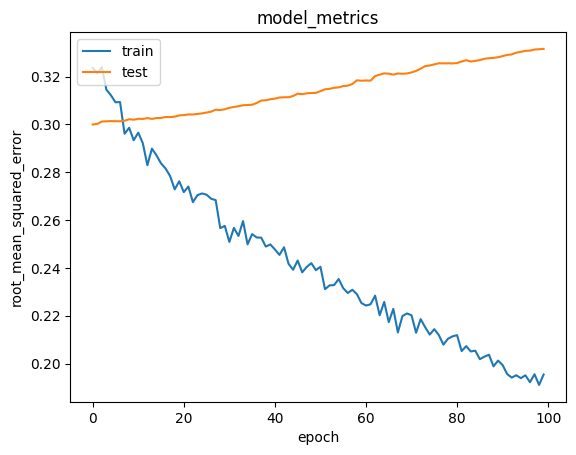

In [91]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

  Pada gambar 3, proses _training_ model cukup smooth dan model konvergen pada _epochs_ sekitar 100. Dari proses ini, diperoleh nilai _error_ akhir sebesar sekitar 0.19 dan _error_ pada data validasi sebesar 0.33. Nilai tersebut cukup bagus untuk sistem rekomendasi.


 Mendapatkan rekomendasi makanan dengan metode _Collaborative Filtering_

   Tahap pertama yaitu ambil sampel user secara acak dan definisikan variabel food_not_displayed yang merupakan daftar makanan yang belum pernah dilihat oleh pelanggan. Hal ini dilakukan karena daftar food_not_displayed inilah yang akan menjadi makanan yang direkomendasikan.


In [92]:
food_df = foods_new
rating_food = pd.read_csv('ratings.csv')

# Mengambil sample user
user_id = rating_food.User_ID.sample(1).iloc[0]
food_displayed_by_user = rating_food[rating_food.User_ID == user_id]

# Operator bitwise (~)
food_not_displayed = food_df[~food_df['id_makanan'].isin(food_displayed_by_user.Food_ID.values)]['id_makanan']
food_not_displayed = list(
    set(food_not_displayed)
    .intersection(set(food_to_food_encoded.keys()))
)

food_not_displayed = [[food_to_food_encoded.get(x)] for x in food_not_displayed]
user_encoder = user_to_user_encoded.get(user_id)
user_food_array = np.hstack(
    ([[user_encoder]] * len(food_not_displayed), food_not_displayed)
)

In [93]:
ratings = model.predict(user_food_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_food_ids = [
    food_encoded_to_food.get(food_not_displayed[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Food with high ratings from user')
print('----' * 8)

top_food_user = (
    food_displayed_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    .Food_ID.values
)

food_df_rows = food_df[food_df['id_makanan'].isin(top_food_user)]
for row in food_df_rows.itertuples():
    print(row.nama_makanan, ':', row.jenis_makanan)

print('----' * 8)
print('Top 10 food recommendation')
print('----' * 8)

recommended_food = food_df[food_df['id_makanan'].isin(recommended_food_ids)]
for row in recommended_food.itertuples():
    print(row.nama_makanan, ':', row.jenis_makanan)

10/10 [==============================] - 0s 2ms/step
Showing recommendations for users: 59.0
Food with high ratings from user
--------------------------------
beetroot modak : Japanese
spicy chicken masala : Indian
corn pulao : Indian
homemade gulab jamun : Dessert
jalapeno cheese fingers : Mexican
--------------------------------
Top 10 food recommendation
--------------------------------
sweet potato and quinoa bowl : Healthy_Food
corn and raw mango salad : Healthy_Food
andhra pan fried pomfret : Indian
christmas chocolate fudge cookies : Dessert
chicken parmigiana with tomato sauce : Italian
pesto fish kebabs : Indian
crunchy vegetable dal sattu croquettes : Italian
active charcoal modak : Japanese
flax seed and beetroot modak : Japanese
black rice : Healthy_Food


Hasil di atas adalah rekomendasi untuk user dengan id 59. Dari _output_ tersebut, didapat perbandingan antara _food with high ratings from user_ dan _Top 10 food recommendation_ untuk user.

   Beberapa makanan rekomendasi menyediakan kategori jenis makanan yang sesuai dengan rating user. Diperoleh 2 rekomendasi makanan dengan kategori jenis makanan 'Indian', 3 rekomendasi makanan dengan kategori 'Healthy_Food', 1 rekomendasi makanan kategori 'Dessert', 2 rekomendasi makanan kategori 'Japanese', dan 2 makanan dengan kategori 'Italian'.
